# ***NOTEBOOK 2: NLP RESEÑAS***


# **Carga de los datos**

*   **Librerias**

Primero, importamos las librerías necesarias y descargamos los recursos que utilizaremos, como el lematizador de NLTK y el modelo de lenguaje de spaCy.

In [ ]:
!pip install google-cloud-storage pandas

In [ ]:
!pip install nltk spacy sentence-transformers vaderSentiment pandas
!python -m spacy download en_core_web_sm

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached spacy-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
  Using cached sentence_transformers-3.3.1-py3-none-any.whl.metadata (10 kB)
  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata (572 bytes)
  Using cached regex-2024.11.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached preshed-3.0.9-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.2 kB)
  Using cached thinc-8.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.4.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached cat

In [ ]:
!pip install scipy
!pip install numpy
!pip install nltk

In [ ]:
pip install scipy==1.9.0

  Using cached scipy-1.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.2 kB)
  Using cached numpy-1.24.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached scipy-1.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.9 MB)
Using cached numpy-1.24.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0

In [ ]:
import nltk
nltk.download('punkt_tab')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import string
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import spacy
import itertools
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Importar NLTK solo cuando sea necesario
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Descargar recursos de NLTK (solo si no están ya descargados)
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Dataset: Recipes**

In [ ]:
from google.cloud import storage
import pandas as pd

# Configura el nombre de tu bucket y archivo
bucket_name = 'mi-bucket-tfg'
file_path = 'datos/df_recipes_filtered.pkl'
local_path = '/tmp/df_recipes_filtered.pkl'

# Conectar a Google Cloud Storage
client = storage.Client()
bucket = client.bucket(bucket_name)
blob = bucket.blob(file_path)
blob.download_to_filename(local_path)

# Cargar el archivo Pickle en un DataFrame
df_recipes = pd.read_pickle(local_path)
df_recipes.head()

,name,description,servings,recipe_id,recipe_grams,recipe_minutes,ingredients_list,ingredients_and_quantities,instructions,keywords,...,sodium_100g,carbohydrate_100g,fiber_100g,sugar_100g,protein_100g,time_group,avg_rating,review_count,n_ingredients,nutriscore
0,Bourbon Chicken,I searched and finally found this recipe on th...,4,45809.0,330.0,35.0,"[boneless chicken breasts, olive oil, garlic c...","[2 lbs boneless chicken breasts, cut into bite...",[1. Editor's Note: Named Bourbon Chicken beca...,"[dinner, chinese, low-carb, chicken, 60-minute...",...,476.67,7.09,0.09,6.52,15.18,30-40,4.31,2892.0,11,C
1,Creamy Cajun Chicken Pasta,N'awlin's style of chicken with an updated Alf...,2,39087.0,373.0,25.0,"[boneless skinless chicken breast halves, ling...","[2 boneless skinless chicken breast halves, cu...",[1. Place chicken and Cajun seasoning in a bow...,"[pasta, dinner, cajun, southern, chicken, 30-m...",...,218.98,12.71,0.67,0.83,10.54,20-30,4.54,1491.0,12,D
2,"Yes, Virginia There is a Great Meatloaf",Absolutely delicious meatloaf and sauce! Those...,4,54257.0,232.0,80.0,"[ground beef, bread, egg, vidalia onions, tabl...",[1 1/2 lbs ground beef (ground shoulder roast ...,[1. Meatloaf: Combine meat loaf ingredients an...,"[dinner, southern, low-carb, time-to-make, cou...",...,543.32,10.00,0.17,8.15,15.30,80-90,4.21,1325.0,11,D
3,Jo Mama's World Famous Spaghetti,My kids will give up a steak dinner for this s...,10,22782.0,285.0,80.0,"[italian sausage, onion, garlic cloves, diced ...","[2 lbs Italian sausage, casings removed (mild ...","[1. In large, heavy stockpot, brown Italian sa...","[dinner, pasta, italian, weeknight, time-to-ma...",...,722.32,17.58,1.33,4.00,10.46,80-90,4.42,1273.0,16,D
4,Pancakes,"This is really a great recipe! It is fast, sim...",1,25690.0,407.0,10.0,"[egg, milk, butter, flour, sugar, baking powde...","[1 egg, 3/4 cup milk, 2 tablespoons butter or ...","[1. Beat egg until fluffy., 2. Add milk and me...","[breakfast, 15-minutes-or-less, time-to-make, ...",...,51.65,3.22,0.10,0.37,0.69,10-20,4.43,1076.0,7,A


*   **Dataset: Reviews**

In [ ]:
from google.cloud import storage
import pandas as pd

# Configura el nombre de tu bucket y archivo
bucket_name = 'mi-bucket-tfg'
file_path = 'datos/df_reviews_filtered.pkl'
local_path = '/tmp/df_reviews_filtered.pkl'

# Conectar a Google Cloud Storage
client = storage.Client()
bucket = client.bucket(bucket_name)
blob = bucket.blob(file_path)
blob.download_to_filename(local_path)

# Cargar el archivo Pickle en un DataFrame
df_reviews = pd.read_pickle(local_path)
df_reviews.head()

,review_id,recipe_id,author_id,rating,review,review_date
0,9,4523,2046,2,i think i did something wrong because i could ...,2000
1,14,44,2085,5,An excellent dish.,2000
2,23,4684,2046,5,this is absolutely delicious. i even served i...,2000
3,28,1451,2416,1,Where does the bbq come in,2000
4,55,7762,2369,3,They taste better than they appear.\r\n,2000


In [ ]:
df_reviews.columns

Index(['review_id', 'recipe_id', 'author_id', 'rating', 'review',
       'review_date'],
      dtype='object')

# **Extracción de aspectos clave de las recetas**

Dado que cada Receta tiene muchas recetas y eso dificulta el procesado de los datos por el volumen, vamos a quedarnos unicamente con las primeras 10 reseñas de cada receta.

In [ ]:
df_reviews = df_reviews.groupby('recipe_id').head(10)

## **Paso 1: Normalizacion de las Reseñas**

La función `normalize()` lleva a cabo varios pasos en el texto, que son:

1. **Tokenización:** Convierte el texto en una lista de palabras individuales usando `nltk.word_tokenize()`.
2. **Conversión a Minúsculas:** Convierte cada palabra a minúsculas para evitar duplicados (por ejemplo, "Good" y "good").
3. **Filtrado de Palabras Alfanuméricas:** Mantiene solo las palabras que son alfabéticas, eliminando así palabras que contengan números o símbolos.
4. **Eliminación de Stopwords:** Omite las stopwords definidas al inicio, para concentrarse solo en palabras con carga semántica.
5. **Lematización:** Aplica la lematización a cada palabra, de forma que variantes de una misma palabra (por ejemplo, "running", "ran") se conviertan en una sola forma base (por ejemplo, "run").

Este proceso permite preparar los textos de reseñas para técnicas de procesamiento de lenguaje natural (NLP) de manera más efectiva, ya que reduce el "ruido" (puntuación, palabras irrelevantes) y unifica variaciones de palabras.

In [ ]:
# Inicializar el lematizador y recursos de NLTK
lemmatizer = WordNetLemmatizer()
stopwords_en = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Normalización de texto (lematización, stopwords y puntuación)
def normalize(text):
    tokens = nltk.word_tokenize(text.lower())
    normalized_text = [
        lemmatizer.lemmatize(word) for word in tokens
        if word.isalpha() and word not in stopwords_en and word not in punctuation
    ]
    return ' '.join(normalized_text)

In [ ]:
df_reviews['normalized_text'] = df_reviews['review'].apply(normalize)

In [ ]:
df_reviews[['review','normalized_text']].head(15)

,review,normalized_text
0,i think i did something wrong because i could ...,think something wrong could taste cornstarch f...
1,An excellent dish.,excellent dish
2,this is absolutely delicious. i even served i...,absolutely delicious even served lime slice co...
3,Where does the bbq come in,bbq come
4,They taste better than they appear.\r\n,taste better appear
5,I think I cooked the chicken too long so the b...,think cooked chicken long breadcrumb mixture b...
6,I think this recipie is awesome. It tastes del...,think recipie awesome taste delicious whole fa...
7,"if you like oysters, this is a great alternati...",like oyster great alternative regular boring s...
8,This greek chicken and rice recipes was so eas...,greek chicken rice recipe easy prepare good re...
9,"I found this meat loaf to be quite tasty, I wa...",found meat loaf quite tasty little nervous car...


## **Paso 2:Extracción de frases clave con spaCy**
Usamos `spaCy` para extraer frases clave de las reseñas, enfocándonos en sustantivos, adjetivos y verbos cercanos, lo que nos da frases más ricas en contexto.
* **Frases clave:** Extraemos sustantivos y los combinamos con adjetivos a la izquierda y verbos a la derecha para formar frases completas y contextuales.
* **Filtrado:** Eliminamos frases de una sola palabra o aquellas que contienen stopwords, para asegurarnos de que solo se extraigan frases relevantes.

In [ ]:
# Cargar el modelo preentrenado de spaCy para análisis sintáctico
nlp = spacy.load("en_core_web_sm")

# Función para extraer frases clave con spaCy y mejorar las combinaciones
def extract_key_phrases_spacy(text):
    doc = nlp(text)
    key_phrases = []

    # Extraer sustantivos y combinarlos con adjetivos y verbos cercanos
    for token in doc:
        if token.pos_ == 'NOUN':
            adj_phrases = [t.text for t in token.lefts if t.pos_ == 'ADJ']
            verb_phrases = [t.text for t in token.rights if t.pos_ == 'VERB']

            # Si hay adjetivos o verbos cercanos, se combinan con el sustantivo
            if adj_phrases:
                key_phrases.append(' '.join(adj_phrases + [token.text]))
            elif verb_phrases:
                key_phrases.append(' '.join([token.text] + verb_phrases))
            else:
                key_phrases.append(token.text)

    # Filtrar por longitud mínima para evitar frases sin sentido
    key_phrases = [phrase for phrase in key_phrases if len(phrase.split()) > 1]

    # Filtrar frases clave irrelevantes
    valid_phrases = [phrase for phrase in key_phrases if not any(word in stopwords_en for word in phrase.split())]
    return valid_phrases

Aplicamos `extract_key_phrases_spacy` a cada registro.

In [ ]:
df_reviews['key_phrases'] = df_reviews['normalized_text'].apply(extract_key_phrases_spacy)

Veamos los resultados:

In [ ]:
df_reviews[['review','key_phrases']].head(15)

,review,key_phrases
0,i think i did something wrong because i could ...,[]
1,An excellent dish.,[excellent dish]
2,this is absolutely delicious. i even served i...,[delicious slice]
3,Where does the bbq come in,[]
4,They taste better than they appear.\r\n,[]
5,I think I cooked the chicken too long so the b...,"[long breadcrumb mixture, little crispy, ratio..."
6,I think this recipie is awesome. It tastes del...,[whole family]
7,"if you like oysters, this is a great alternati...",[great alternative regular stuffing]
8,This greek chicken and rice recipes was so eas...,"[greek recipe, greek meal, greek food]"
9,"I found this meat loaf to be quite tasty, I wa...","[little nervous carrot, sweeter loaf, large lo..."


## **Paso 3: Análisis de sentimientos con VADER**
Aplicamos `VADER`  (Valence Aware Dictionary and Sentiment Reasoner) para calcular la polaridad de cada frase clave. Un valor positivo indica una actitud positiva, uno negativo indica una crítica, y uno cercano a cero es neutral. Los valores van desde -1 (muy negativo) a 1 (muy positivo).

In [ ]:
# Inicializar el analizador de sentimientos VADER
analyzer = SentimentIntensityAnalyzer()

# Función para analizar sentimientos con VADER
def analyze_sentiment_vader(phrases):
    sentiments = {}
    for phrase in phrases:
        score = analyzer.polarity_scores(phrase)['compound']
        sentiments[phrase] = score
    return sentiments

Aplicamos `analyze_sentiment_vader` a cada registro.

In [ ]:
df_reviews['phrase_sentiments'] = df_reviews['key_phrases'].apply(analyze_sentiment_vader)

Veamos los resultados.

In [ ]:
df_reviews[['key_phrases', 'phrase_sentiments']].head(15)

,key_phrases,phrase_sentiments
0,[],{}
1,[excellent dish],{'excellent dish': 0.5719}
2,[delicious slice],{'delicious slice': 0.5719}
3,[],{}
4,[],{}
5,"[long breadcrumb mixture, little crispy, ratio...","{'long breadcrumb mixture': 0.0, 'little crisp..."
6,[whole family],{'whole family': 0.0}
7,[great alternative regular stuffing],{'great alternative regular stuffing': 0.6249}
8,"[greek recipe, greek meal, greek food]","{'greek recipe': 0.0, 'greek meal': 0.0, 'gree..."
9,"[little nervous carrot, sweeter loaf, large lo...","{'little nervous carrot': -0.204, 'sweeter loa..."


## **Paso 4: Categorización de frases según polaridad**
Clasificamos las frases en tres categorías: positivas, negativas y neutras, basándonos en la puntuación de sentimiento obtenida en el paso anterior.

In [ ]:
# Categorización de frases según polaridad
def categorize_phrases_vader(sentiments, positive_threshold=0.2, negative_threshold=-0.2):
    categorized = {'positive': [], 'negative': [], 'neutral': []}
    for phrase, score in sentiments.items():
        if score > positive_threshold:
            categorized['positive'].append(phrase)
        elif score < negative_threshold:
            categorized['negative'].append(phrase)
        else:
            categorized['neutral'].append(phrase)
    return categorized

Aplicamos `categorize_phrases_vader` a cada registro.

In [ ]:
df_reviews['categorized_phrases'] = df_reviews['phrase_sentiments'].apply(categorize_phrases_vader)

Veamos la nueva variable:

In [ ]:
df_reviews[['review','categorized_phrases']].head(15)

,review,categorized_phrases
0,i think i did something wrong because i could ...,"{'positive': [], 'negative': [], 'neutral': []}"
1,An excellent dish.,"{'positive': ['excellent dish'], 'negative': [..."
2,this is absolutely delicious. i even served i...,"{'positive': ['delicious slice'], 'negative': ..."
3,Where does the bbq come in,"{'positive': [], 'negative': [], 'neutral': []}"
4,They taste better than they appear.\r\n,"{'positive': [], 'negative': [], 'neutral': []}"
5,I think I cooked the chicken too long so the b...,"{'positive': [], 'negative': [], 'neutral': ['..."
6,I think this recipie is awesome. It tastes del...,"{'positive': [], 'negative': [], 'neutral': ['..."
7,"if you like oysters, this is a great alternati...",{'positive': ['great alternative regular stuff...
8,This greek chicken and rice recipes was so eas...,"{'positive': [], 'negative': [], 'neutral': ['..."
9,"I found this meat loaf to be quite tasty, I wa...","{'positive': ['good loaf'], 'negative': ['litt..."


## **Paso 5: Procesamiento de reseñas y agrupación por receta**
Aplicamos todas las funciones anteriores al DataFrame de reseñas, normalizando el texto, extrayendo las frases clave, realizando el análisis de sentimientos y categorizando las frases por receta.

In [ ]:
# Separar los aspectos destacados y criticados
df_reviews['highlighted_aspects'] = df_reviews['categorized_phrases'].apply(lambda x: x['positive'])
df_reviews['criticized_aspects'] = df_reviews['categorized_phrases'].apply(lambda x: x['negative'])

# Agrupar por receta y combinar los aspectos
df_recipe_aspects = df_reviews.groupby('recipe_id').agg({
    'highlighted_aspects': 'sum',
    'criticized_aspects': 'sum'
    }).reset_index()

# Eliminar duplicados
df_recipe_aspects['highlighted_aspects'] = df_recipe_aspects['highlighted_aspects'].apply(lambda x: list(set(x)))
df_recipe_aspects['criticized_aspects'] = df_recipe_aspects['criticized_aspects'].apply(lambda x: list(set(x)))

In [ ]:
df_recipe_aspects

,recipe_id,highlighted_aspects,criticized_aspects
0,44,"[excellent dish, nice creamy good taste, great...",[much trouble]
1,49,"[excellent dish, regular great pasta, nice cru...",[]
2,59,"[warm bruschetta, tasty treat, fantastic recip...",[]
3,62,"[good pinch, great dish, good better blend, fl...",[]
4,104,"[simple delicious, good easy dish, good love, ...",[]
...,...,...,...
49995,536845,[nice little wife],[]
49996,536930,[huge time],[]
49997,536973,"[adventurous eater, serious winner, good recip...",[]
49998,537472,"[great husband, delicious cauliflower]",[wrong taste]


Como se pueden ver que quedaron algunos terminos irrelevantes para el analisis y proposito del trabajo, vamos a eliminarlos para que los resultados tengan mas sentido.

In [ ]:
irrelevant_terms = {'husband', 'wife', 'father', 'mother', 'baby', 'kid', 'children', 'family', 'thanks'}

def remove_irrelevant_terms(phrases):
    filtered_phrases = []
    for phrase in phrases:
        # Dividir la frase en palabras y verificar si contiene algún término irrelevante
        if not any(term in phrase.split() for term in irrelevant_terms):
            filtered_phrases.append(phrase)
    return filtered_phrases

df_recipe_aspects['highlighted_aspects'] = df_recipe_aspects['highlighted_aspects'].apply(remove_irrelevant_terms)
df_recipe_aspects['criticized_aspects'] = df_recipe_aspects['criticized_aspects'].apply(remove_irrelevant_terms)

df_recipe_aspects

,recipe_id,highlighted_aspects,criticized_aspects
0,44,"[excellent dish, nice creamy good taste, great...",[much trouble]
1,49,"[excellent dish, regular great pasta, nice cru...",[]
2,59,"[warm bruschetta, tasty treat, fantastic recip...",[]
3,62,"[good pinch, great dish, good better blend, fl...",[]
4,104,"[simple delicious, good easy dish, good love, ...",[]
...,...,...,...
49995,536845,[],[]
49996,536930,[huge time],[]
49997,536973,"[adventurous eater, serious winner, good recip...",[]
49998,537472,[delicious cauliflower],[wrong taste]


# **Análisis**

In [ ]:
all_highlighted = list(itertools.chain.from_iterable(df_reviews['highlighted_aspects']))

# Contar frecuencia de frases y palabras en cada categoría
highlighted_counts = Counter(all_highlighted)

# Mostrar las frases más comunes
print("Aspectos más destacados (positivos):")
for aspect in highlighted_counts.most_common(10):
  print(aspect)

Aspectos más destacados (positivos):
('great recipe', 15585)
('good recipe', 4016)
('wonderful recipe', 3398)
('thanks posting', 3379)
('great way', 2194)
('great flavor', 2168)
('excellent recipe', 2065)
('easy recipe', 2040)
('delicious recipe', 1625)
('great dish', 1540)


In [ ]:
all_criticized = list(itertools.chain.from_iterable(df_reviews['criticized_aspects']))
criticized_counts = Counter(all_criticized)

print("Aspectos más criticados (negativos):")
for aspect in criticized_counts.most_common(10):
  print(aspect)

Aspectos más criticados (negativos):
('low sodium', 397)
('low fat', 239)
('low calorie', 189)
('wrong recipe', 161)
('low hour', 151)
('low fat cheese', 134)
('kid block', 117)
('low fat sour cream', 95)
('little trouble', 92)
('low heat', 90)


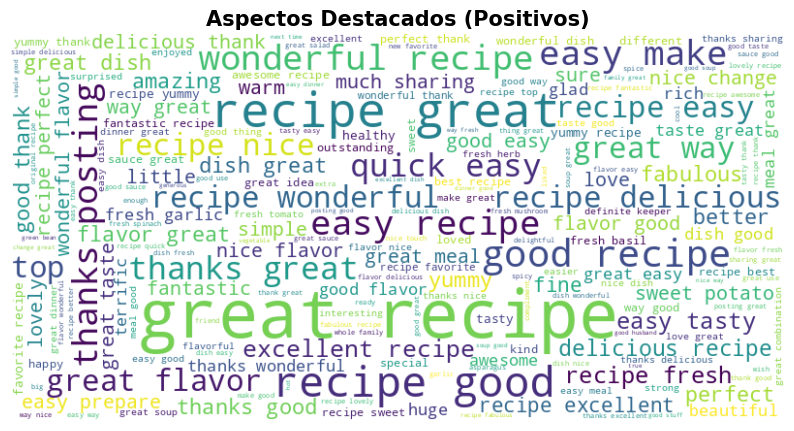

In [ ]:
highlighted_text = ' '.join(all_highlighted)
highlighted_wordcloud = WordCloud(width=800, height=400, max_font_size=70, background_color="white").generate(highlighted_text)

plt.figure(figsize=(10, 6))
plt.imshow(highlighted_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Aspectos Destacados (Positivos)', fontsize=15, fontweight='bold')
plt.show()

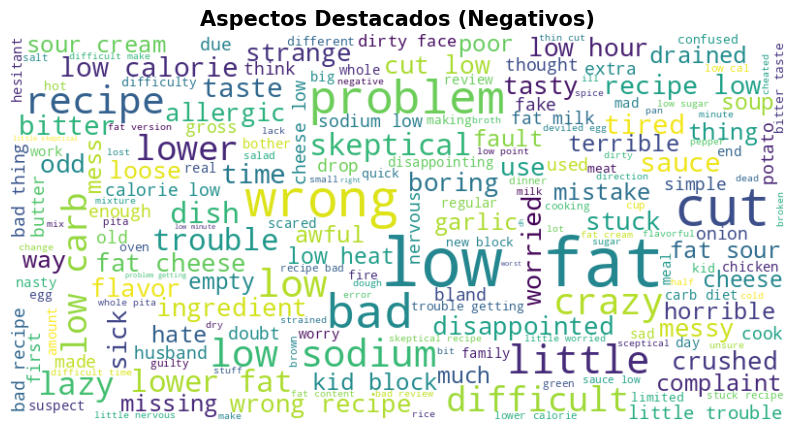

In [ ]:
criticized_text = ' '.join(all_criticized)
criticized_wordcloud = WordCloud(width=800, height=400, max_font_size=70, background_color="white").generate(criticized_text)

plt.figure(figsize=(10, 6))
plt.imshow(criticized_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Aspectos Destacados (Negativos)', fontsize=15, fontweight='bold')
plt.show()

Antes de exportarlo, unamoslos los aspectos destacados a el df_recipes.

In [ ]:
df_recipes = pd.merge(df_recipes, df_recipe_aspects, left_on='recipe_id', right_on='recipe_id', how='left')

In [ ]:
df_recipes

,name,description,servings,recipe_id,recipe_grams,recipe_minutes,ingredients_list,ingredients_and_quantities,instructions,keywords,...,fiber_100g,sugar_100g,protein_100g,time_group,avg_rating,review_count,n_ingredients,nutriscore,highlighted_aspects,criticized_aspects
0,Bourbon Chicken,I searched and finally found this recipe on th...,4,45809.0,330.0,35.0,"[boneless chicken breasts, olive oil, garlic c...","[2 lbs boneless chicken breasts, cut into bite...",[1. Editor's Note: Named Bourbon Chicken beca...,"[dinner, chinese, low-carb, chicken, 60-minute...",...,0.09,6.52,15.18,30-40,4.31,2892.0,11,C,"[aabout thick perfection, good recipe, great t...",[]
1,Creamy Cajun Chicken Pasta,N'awlin's style of chicken with an updated Alf...,2,39087.0,373.0,25.0,"[boneless skinless chicken breast halves, ling...","[2 boneless skinless chicken breast halves, cu...",[1. Place chicken and Cajun seasoning in a bow...,"[pasta, dinner, cajun, southern, chicken, 30-m...",...,0.67,0.83,10.54,20-30,4.54,1491.0,12,D,"[good give, perfect taste, wonderful pasta, pe...",[stuck recipe]
2,"Yes, Virginia There is a Great Meatloaf",Absolutely delicious meatloaf and sauce! Those...,4,54257.0,232.0,80.0,"[ground beef, bread, egg, vidalia onions, tabl...",[1 1/2 lbs ground beef (ground shoulder roast ...,[1. Meatloaf: Combine meat loaf ingredients an...,"[dinner, southern, low-carb, time-to-make, cou...",...,0.17,8.15,15.30,80-90,4.21,1325.0,11,D,"[awesome dh, sweet side, interesting palate, s...",[]
3,Jo Mama's World Famous Spaghetti,My kids will give up a steak dinner for this s...,10,22782.0,285.0,80.0,"[italian sausage, onion, garlic cloves, diced ...","[2 lbs Italian sausage, casings removed (mild ...","[1. In large, heavy stockpot, brown Italian sa...","[dinner, pasta, italian, weeknight, time-to-ma...",...,1.33,4.00,10.46,80-90,4.42,1273.0,16,D,"[good ingredient, easy make, famous cool favor...","[lower fat content, sausage drained]"
4,Pancakes,"This is really a great recipe! It is fast, sim...",1,25690.0,407.0,10.0,"[egg, milk, butter, flour, sugar, baking powde...","[1 egg, 3/4 cup milk, 2 tablespoons butter or ...","[1. Beat egg until fluffy., 2. Add milk and me...","[breakfast, 15-minutes-or-less, time-to-make, ...",...,0.10,0.37,0.69,10-20,4.43,1076.0,7,A,"[simple delicious daughter, delicious easy rec...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Cauliflower and Scallions With Black Mustard S...,Easy to make with wonderful Indian flavors,8,209114.0,137.0,25.0,"[cauliflower, scallions, black mustard seeds, ...","[1 head cauliflower, about 1 1/4 lb , 2 bunche...",[1. Separate and cut the cauliflower into 1-in...,"[side, healthy, low-carb, low-sodium, low-calo...",...,2.41,2.12,1.90,20-30,2.50,2.0,10,B,"[helpful recipe, wonderful way, delicious flavor]",[missing try]
49996,"Wild Rice, Minnesota Style",I love wild rice and this is an extremely easy...,6,77982.0,276.0,105.0,"[chicken stock, wild rice, celery, onion, mush...","[4 or 5 cups chicken stock, 1 1/2 cups wild r...","[1. Preheat oven to 375°F., 2. Place all ingre...","[side, healthy, rice, dinner, low-sodium, low-...",...,1.27,2.07,3.99,100-110,5.00,2.0,7,A,[great flavor],[alternative boring turkey]
49997,Apple &amp; Ricotta Slice,"Delicious served warm or cold, as a dessert or...",6,316357.0,185.0,45.0,"[cooking apples, mixed spice, demerara sugar, ...","[500 g cooking apples, peeled & cored , 1 tabl...",[1. Preheat the oven to 220c/fan200c/gas 7 &am...,"[dessert, 60-minutes-or-less, time-to-make, co...",...,2.11,7.14,7.14,40-50,4.00,2.0,9,D,"[ricotta liked, good sauce, generous dollop, w...",[]
49998,Hard-Fried Chicken,The Splendid Table radio program featured the ...,4,517638.0,452.0,30.0,"[all-purpose flour, seasoning, baking powder, ...","[3 1/2 cups all or purpose flour, 1/2 cup all ...","[1. Make the dredge: In a large bowl, combine ...","[dinner, southern, chicken, 30-minutes-or-less...",...,0.75,0.07,15.20,30-40,4.50,2.0,7,C,"[e

Exportamos el df para seguir trabajando en la siguiente notebook.

In [ ]:
bucket_name = 'mi-bucket-tfg'
pickle_file_path = 'df_recipe_aspects.pkl'

df_recipes.to_pickle(pickle_file_path)

# Conectar con el cliente de Google Cloud Storage
client = storage.Client()
bucket = client.bucket(bucket_name)
blob = bucket.blob('datos/df_recipe_aspects.pkl')

# Subir el archivo pickle al bucket
blob.upload_from_filename(pickle_file_path)

print(f'El archivo pickle ha sido subido exitosamente al bucket {bucket_name}')

El archivo pickle ha sido subido exitosamente al bucket mi-bucket-tfg


In [ ]:
# Categorización de frases según polaridad
def categorize_phrases_vader(sentiments, positive_threshold=0.2, negative_threshold=-0.2):
    categorized = {'positive': [], 'negative': [], 'neutral': []}

    for phrase, score in sentiments.items():
        lower_phrase = phrase.lower()  # Convertir la frase a minúsculas para comparación insensible

        # Clasificar directamente como neutral si contiene la palabra "low"
        if 'low' in lower_phrase:
            categorized['neutral'].append(phrase)
        elif score > positive_threshold:
            categorized['positive'].append(phrase)
        elif score < negative_threshold:
            categorized['negative'].append(phrase)
        else:
            categorized['neutral'].append(phrase)

    return categorized